In [1]:
import numpy as np
from scipy.integrate import odeint
import qutip as qt
import matplotlib.pyplot as plt

In [2]:
ħ = 1
k = 0.5
v = np.linspace(-20,20,1001)
Ω = np.pi
δ = -1
δm = δ-k*v
δp = δ+k*v
Γ = 2

In [3]:
g = qt.basis(2,0)
e = qt.basis(2,1)
σ = g*e.dag()
L = Γ*qt.lindblad_dissipator(σ)

In [4]:
def H(Ω,δ):
    return (ħ*Ω/2)*(σ+σ.dag())-ħ*δ*e*e.dag()

In [5]:
ρm = []
ρp = []
for i in range(len(v)):
    ρm.append(qt.steadystate(H(Ω,δm[i]), [L]))
    ρp.append(qt.steadystate(H(Ω,δp[i]), [L]))

In [6]:
ρm[500]   # Es para v=0 y es igual a ρp[500]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.64420022+0.j         -0.22650918+0.22650918j]
 [-0.22650918-0.22650918j  0.35579978+0.j        ]]

In [7]:
ρee = (Ω/Γ)**2/(1+(2*δ/Γ)**2+2*(Ω/Γ)**2)
ρeg = -1j*(Ω/Γ)*(1+2j*δ/Γ)/(1+(2*δ/Γ)**2+2*(Ω/Γ)**2)

In [8]:
qt.Qobj([[1-ρee,np.conj(ρeg)],[ρeg,ρee]])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.64420022+0.j         -0.22650918+0.22650918j]
 [-0.22650918-0.22650918j  0.35579978+0.j        ]]

In [9]:
Fopm = []
Fopp = []
for i in range(len(v)):
    Fopm.append((1j/ħ)*qt.commutator(H(Ω,δm[i]), qt.momentum(2)))
    Fopp.append((1j/ħ)*qt.commutator(H(Ω,δp[i]), qt.momentum(2)))

In [10]:
F = []
for i in range(len(v)):
    F.append(-(ρm[i]*Fopm[i]).tr()+(ρp[i]*Fopp[i]).tr())

In [11]:
Fa = (ħ*k*Ω**2/Γ)*(1/(1+2*Ω**2/Γ**2+4*δm**2/Γ**2)-1/(1+2*Ω**2/Γ**2+4*δp**2/Γ**2))

In [12]:
plt.plot(v,s)
plt.plot(v,Fa, color='green')
plt.show()

NameError: name 's' is not defined

In [491]:
def f(y, t):
    return (y[1], F(y[1]))
ys = odeint(f, [-2,3], v)
#x.append(res.y[0])
#p.append(res.y[1])

TypeError: 'list' object is not callable

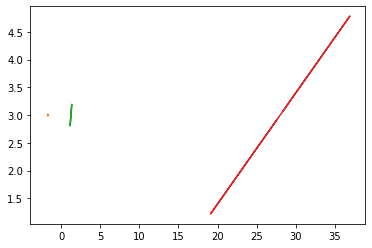

In [265]:
plt.plot(x,p)